-Reading processed data

In [3]:
import pandas as pd

df = pd.read_csv("heart_disease (2).csv")
print(df.head())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  


-PCA

In [4]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
#separting all features and num
X = df.drop('num', axis=1)
y = df['num']

In [6]:
#standarizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
#applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [11]:
#determinig optimals
evr = pca.explained_variance_ratio_
print(evr)
cvr = np.cumsum(evr)
print(cvr)

optimal_components = np.argmax(cvr >= 0.95) + 1
print("Optimal number of components:", optimal_components)

[0.23668957 0.12299426 0.09541984 0.08457844 0.07585103 0.0677347
 0.06620699 0.05977317 0.05295412 0.04339731 0.03532078 0.03165649
 0.02742331]
[0.23668957 0.35968383 0.45510366 0.5396821  0.61553313 0.68326783
 0.74947482 0.80924799 0.86220211 0.90559942 0.9409202  0.97257669
 1.        ]
Optimal number of components: 12


-Visualizing

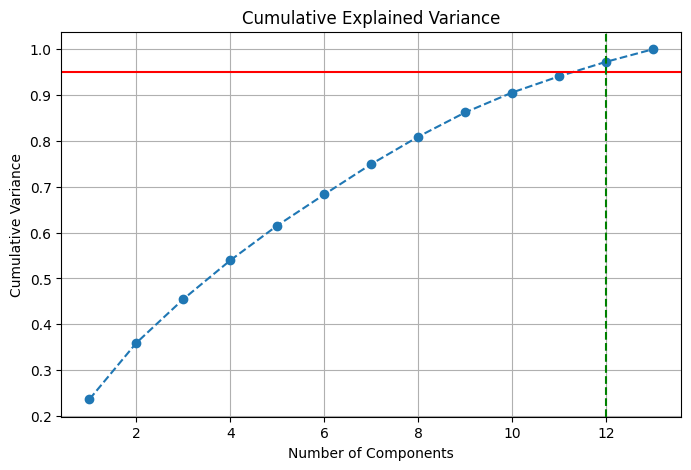

In [12]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cvr)+1), cvr, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=optimal_components, color='g', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.show()

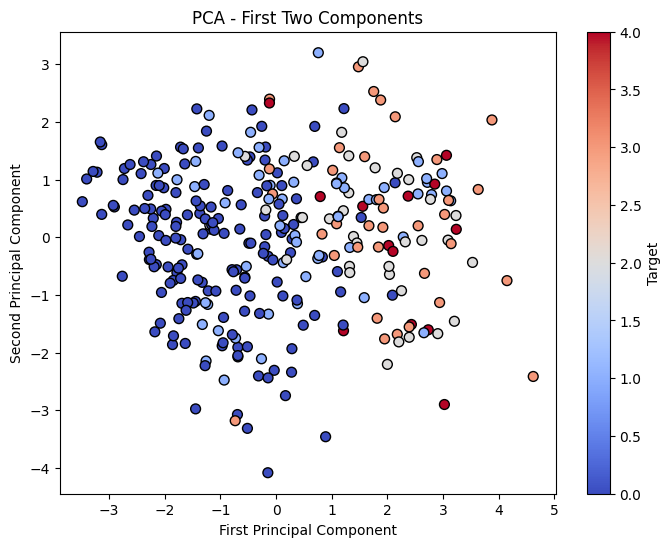

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First Two Components')
plt.colorbar(label='Target')
plt.show()